In [7]:
import numpy as np# Importing every library we need

In [8]:
import seaborn as sns

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv("data0.csv")

In [11]:
df.head()

,Market Place,Crop Variety,Producer Min,Producer Max,Wholesale Min,Wholesale Max,Retail Min,Retail Max,Volume,Collection Date
0,Shewa Robit Kebele 02 Gebeya,White Teff (Quintal),0,0.0,0,0,3000.0,3200,Under,12/10/2019
1,Enjbara,White Teff (Quintal),0,0.0,3200,3250,3300.0,3400,Sufficient,12/10/2019
2,Debretabor Segno Gebeya,White Teff (Quintal),0,0.0,3100,3150,3200.0,3250,Under,12/10/2019
3,Woldia Gebeya,White Teff (Quintal),2691,2760.0,0,0,2760.0,2829,Sufficient,12/10/2019
4,Merawi Gebeya,White Teff (Quintal),3000,3100.0,0,0,3100.0,3200,Sufficient,12/11/2019


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6343 entries, 0 to 6342
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Market Place     6343 non-null   object 
 1   Crop Variety     6343 non-null   object 
 2   Producer Min     6343 non-null   int64  
 3   Producer Max     6343 non-null   float64
 4   Wholesale Min    6343 non-null   int64  
 5   Wholesale Max    6343 non-null   int64  
 6   Retail Min       6343 non-null   float64
 7   Retail Max       6343 non-null   int64  
 8   Volume           6343 non-null   object 
 9   Collection Date  6343 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 495.7+ KB


In [13]:
df.dropna(inplace = True)

In [14]:
df.isnull().sum()

Market Place       0
Crop Variety       0
Producer Min       0
Producer Max       0
Wholesale Min      0
Wholesale Max      0
Retail Min         0
Retail Max         0
Volume             0
Collection Date    0
dtype: int64

In [15]:
data2=df.copy()

In [16]:
data2 = data2.dropna()

In [17]:
data2.isnull().sum()

Market Place       0
Crop Variety       0
Producer Min       0
Producer Max       0
Wholesale Min      0
Wholesale Max      0
Retail Min         0
Retail Max         0
Volume             0
Collection Date    0
dtype: int64

In [18]:
data2 = data2.drop(columns='Retail Min')# multiple in one (['f','h])

In [19]:
data2 = data2.drop(columns='Wholesale Max')

In [20]:
data2 = data2.drop(columns='Wholesale Min')

In [21]:
data2 = data2.drop(columns='Producer Max')

In [22]:
data2 = data2.drop(columns='Producer Min')

In [23]:
data2.head()

,Market Place,Crop Variety,Retail Max,Volume,Collection Date
0,Shewa Robit Kebele 02 Gebeya,White Teff (Quintal),3200,Under,12/10/2019
1,Enjbara,White Teff (Quintal),3400,Sufficient,12/10/2019
2,Debretabor Segno Gebeya,White Teff (Quintal),3250,Under,12/10/2019
3,Woldia Gebeya,White Teff (Quintal),2829,Sufficient,12/10/2019
4,Merawi Gebeya,White Teff (Quintal),3200,Sufficient,12/11/2019


In [24]:
data2["Collection Date"][4]

'12/11/2019'

In [25]:
data2["Collection Date"].value_counts()

Collection Date
1/29/2022     46
1/14/2023     42
12/24/2022    42
12/31/2022    41
12/17/2022    41
              ..
12/23/2022     1
8/7/2022       1
4/28/2020      1
12/16/2022     1
1/20/2023      1
Name: count, Length: 818, dtype: int64

In [26]:
str = data2["Collection Date"][1]#taking any arbitrary data spliting it by calling split methode
str2 = str.split()#spliting it to 5,/,1,/,2019   thus str[6] out of range 
print(str)
print(str2)
print(str[0])

12/10/2019
['12/10/2019']
1


In [27]:
#creating dictionary to store the months in
Dict = {1 :"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}
print(Dict)

{1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}


In [28]:
Dict[3]

'March'

In [29]:
month = []#creating empty column

In [30]:
for rr in data2["Collection Date"]:
    str = rr
    str2 = str.split('/')
    month.append(Dict[int(str2[0])])#taking the first term, (month) from the splited

In [31]:
len(month)

6343

In [32]:
data2["month"] = month

In [33]:
data2["month"]

0       December
1       December
2       December
3       December
4       December
          ...   
6338     January
6339     January
6340     January
6341     January
6342     January
Name: month, Length: 6343, dtype: object

In [34]:
data2["month"].unique()

array(['December', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November'], dtype=object)

In [35]:
season =[]#creating empty column of season

In [36]:
for tt in data2["month"]:
    if tt== "December" or tt=="January" or tt=="February":
        season.append("Winter")
    elif tt=="March" or tt=="April" or tt== "May":
            season.append("Autumn")
    elif tt=="June" or tt=="July" or tt == "August":
            season.append("Summer")
    elif tt=="September" or tt=="October" or tt== "November":
            season.append("Spring")

In [37]:
len(season)

6343

In [38]:
data2["season"] = season

In [39]:
data2["season"]

0       Winter
1       Winter
2       Winter
3       Winter
4       Winter
         ...  
6338    Winter
6339    Winter
6340    Winter
6341    Winter
6342    Winter
Name: season, Length: 6343, dtype: object

In [40]:
import pandas as pd 
df = pd.Timestamp("5/3/2023")
print(df.dayofweek)# will give each day like 0 = monday, 1=tuesday....

2


In [41]:
day_of_week = []

In [42]:
for rr in data2["Collection Date"]:#finding out value of each date and craating day column
    str = rr
    df = pd.Timestamp(rr)
    day = df.dayofweek
    day_of_week.append(day)

In [43]:
len(day_of_week)

6343

In [44]:
data2["day"]=day_of_week # putting the created day column to the data

In [45]:
data2.head()

,Market Place,Crop Variety,Retail Max,Volume,Collection Date,month,season,day
0,Shewa Robit Kebele 02 Gebeya,White Teff (Quintal),3200,Under,12/10/2019,December,Winter,1
1,Enjbara,White Teff (Quintal),3400,Sufficient,12/10/2019,December,Winter,1
2,Debretabor Segno Gebeya,White Teff (Quintal),3250,Under,12/10/2019,December,Winter,1
3,Woldia Gebeya,White Teff (Quintal),2829,Sufficient,12/10/2019,December,Winter,1
4,Merawi Gebeya,White Teff (Quintal),3200,Sufficient,12/11/2019,December,Winter,2


In [46]:
data1 = data2.copy()

In [47]:
data2 = data2.drop(columns='Collection Date') #delating the column collection date not necessary any more

In [48]:
data2.head()

,Market Place,Crop Variety,Retail Max,Volume,month,season,day
0,Shewa Robit Kebele 02 Gebeya,White Teff (Quintal),3200,Under,December,Winter,1
1,Enjbara,White Teff (Quintal),3400,Sufficient,December,Winter,1
2,Debretabor Segno Gebeya,White Teff (Quintal),3250,Under,December,Winter,1
3,Woldia Gebeya,White Teff (Quintal),2829,Sufficient,December,Winter,1
4,Merawi Gebeya,White Teff (Quintal),3200,Sufficient,December,Winter,2


<Axes: >

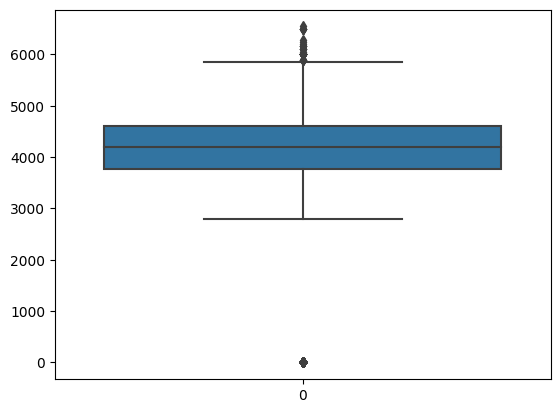

In [49]:
import seaborn as sns
sns.boxplot(data2['Retail Max'])# look if there are out layers and remove them

# Removing out layers of Retail Max price 25%<values<75% out of this range

In [50]:
#IQR
Q1=np.percentile(data2['Retail Max'], 25,interpolation="midpoint")
Q3=np.percentile(data2['Retail Max'], 75,interpolation="midpoint")
IQR=Q3-Q1

C:\Users\user\AppData\Local\Temp\ipykernel_12464\2964940248.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data2['Retail Max'], 25,interpolation="midpoint")
C:\Users\user\AppData\Local\Temp\ipykernel_12464\2964940248.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3=np.percentile(data2['Retail Max'], 75,interpolation="midpoint")


In [51]:
#Upper bound
upper=np.where(data2['Retail Max']>=(Q3+1.5*IQR))
#Lower bound
lower=np.where(data2['Retail Max']<=(Q1-1.5*IQR))


In [52]:
print(upper[0],lower[0])

[4892 5015 5050 5914 5986 6055 6056 6057 6066 6085 6096 6103 6108 6124
 6129 6130 6131 6140 6145 6158 6163 6179 6201 6207 6210 6217 6218 6221
 6227 6230 6248 6249 6263 6269 6271 6302 6309 6318 6320 6322 6327 6328
 6332 6333 6337 6338] [  10   16   52   57   93   94   98  135  136  141  172  173  179  213
  215  220  249  250  258  288  291  293  301  333  334  341  374  375
  415  419  428  460  461  472  498  501  510  542  544  554  586  587
  592  624  627  637  657  680  687  702  750  751  773  790  791  801
  834  836  848  876  877  887  915  916  925  956  957  970  990  998
 1029 1039 1066 1068 1079 1096 1107 1124 1145 1167 1186 1190 1205 1206
 1225 1227 1238 1267 1268 1284 1316 1317 1332 1356 1397 1398 1405 1436
 1438 1440 1461 1482 1483 1490 1523 1524 1553 1555 1571 1592 1594 1598
 1634 1636 1640 1676 1677 1687 1713 1714 1716 1723 1751 1756 1762 1766
 1792 1822 1826 1838 1860 1864 1879 1903 1905 1919 1947 1948 1958 1988
 1989 1991 2003 2029 2030 2047 2070 2071 2087 2115 2116

In [53]:
#...Removing the outliers...
data2.drop(upper[0], inplace=True)
data2.drop(lower[0], inplace=True)

print("New Shape: ", data2.shape)

New Shape:  (5819, 7)


<Axes: >

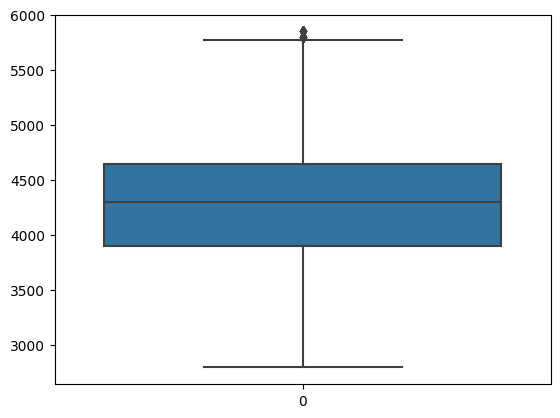

In [54]:
sns.boxplot(data2['Retail Max'])

# Graphical Analysis

<IPython.core.display.Javascript object>

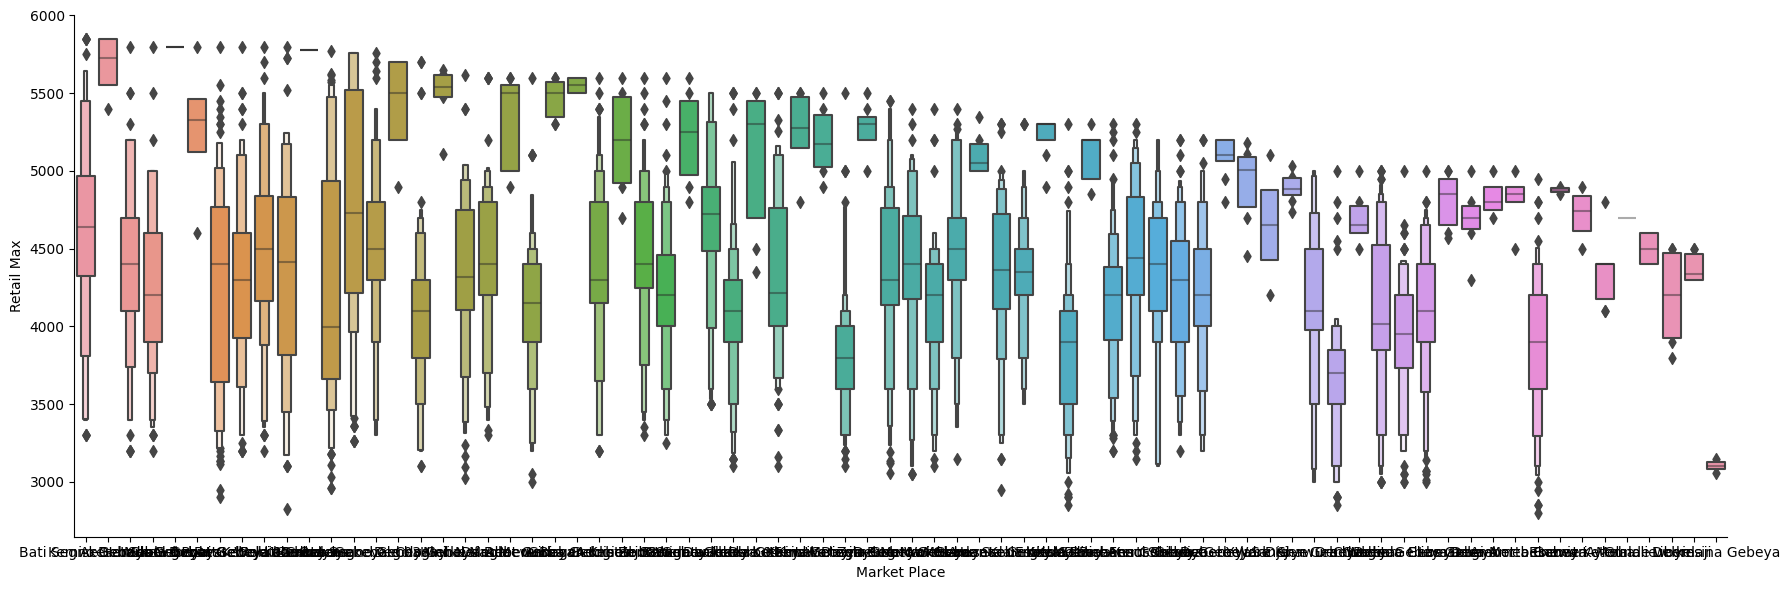

In [55]:
# market place  vs retail max
sns.catplot(y = "Retail Max", x = "Market Place", data = data2.sort_values("Retail Max", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<IPython.core.display.Javascript object>

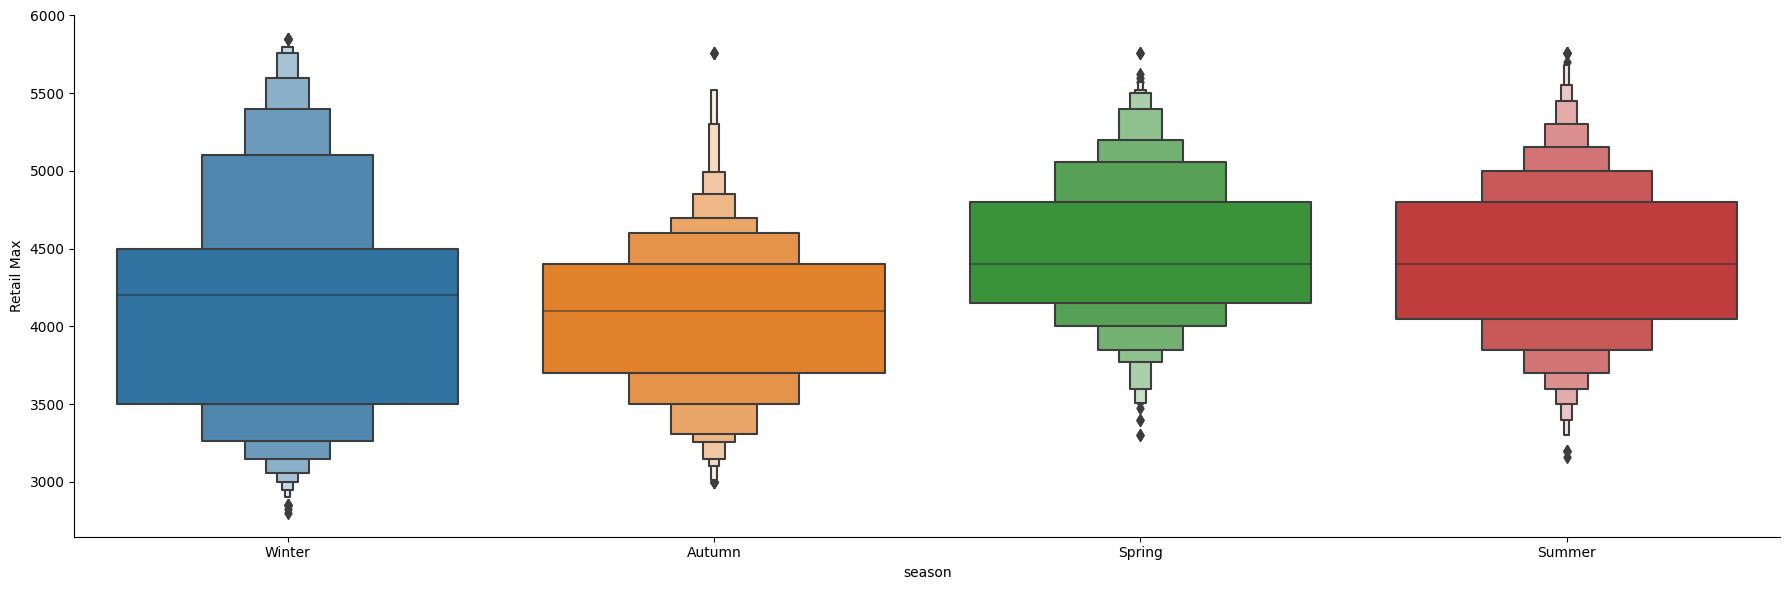

In [56]:
# market place  vs retail max
sns.catplot(y = "Retail Max", x = "season", data = data2.sort_values("Retail Max", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<IPython.core.display.Javascript object>

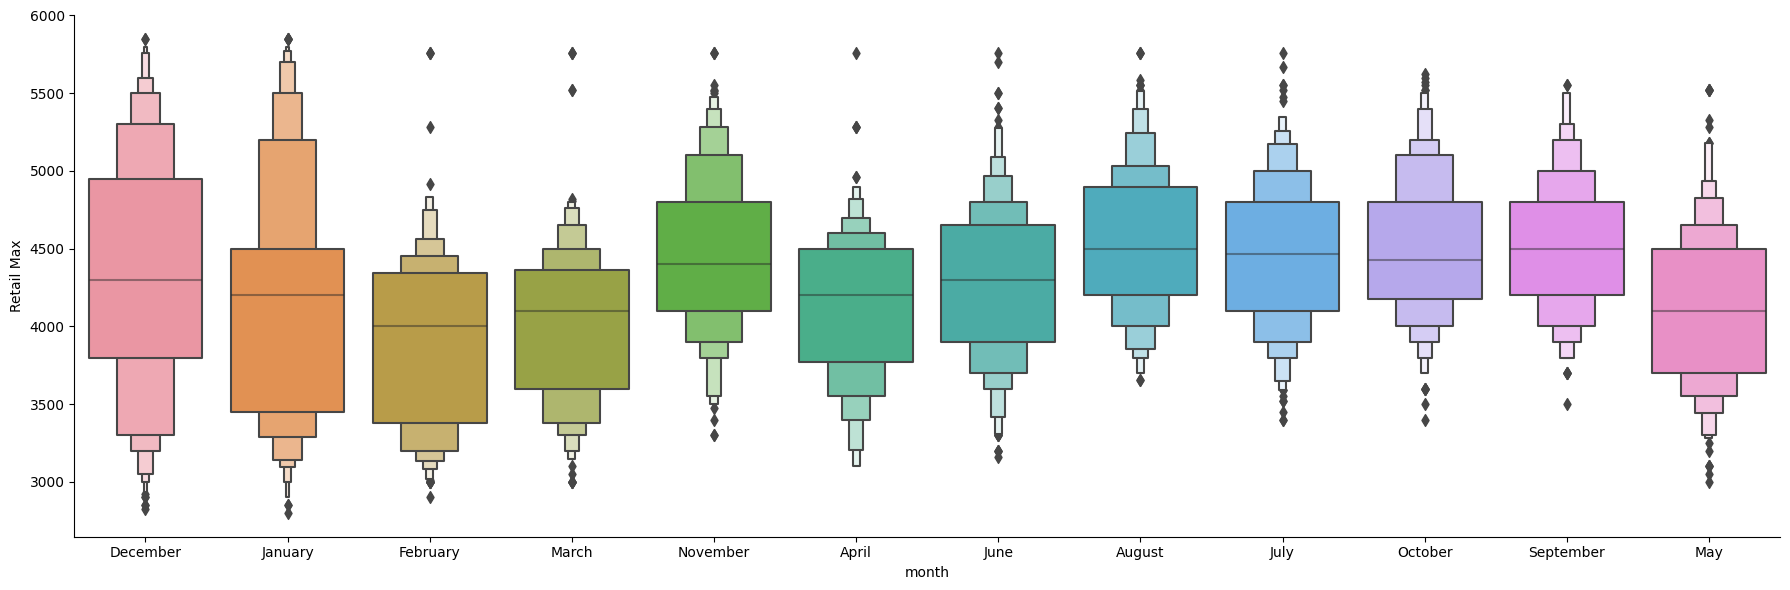

In [57]:
# market place  vs retail max
sns.catplot(y = "Retail Max", x = "month", data = data2.sort_values("Retail Max", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<IPython.core.display.Javascript object>

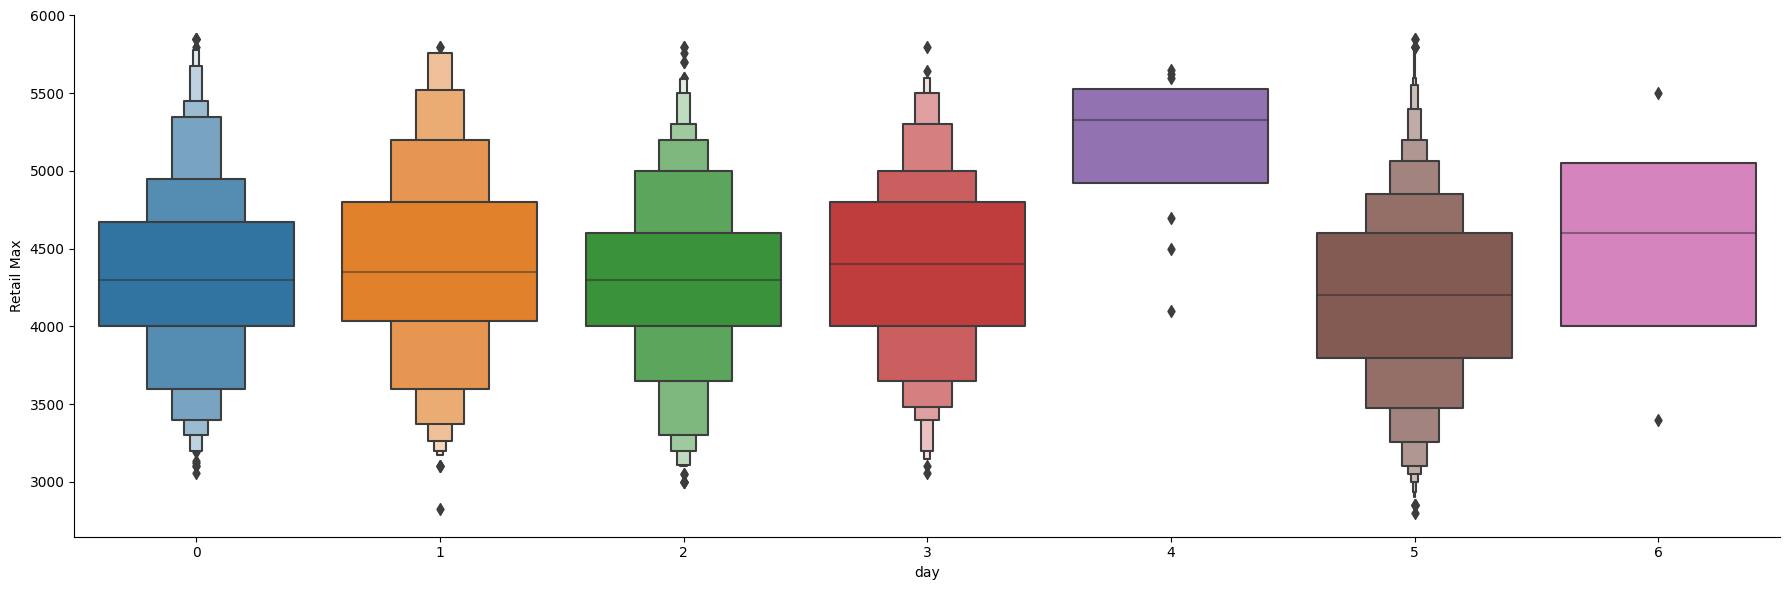

In [58]:
# market place  vs retail max
sns.catplot(y = "Retail Max", x = "day", data = data2.sort_values("Retail Max", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<IPython.core.display.Javascript object>

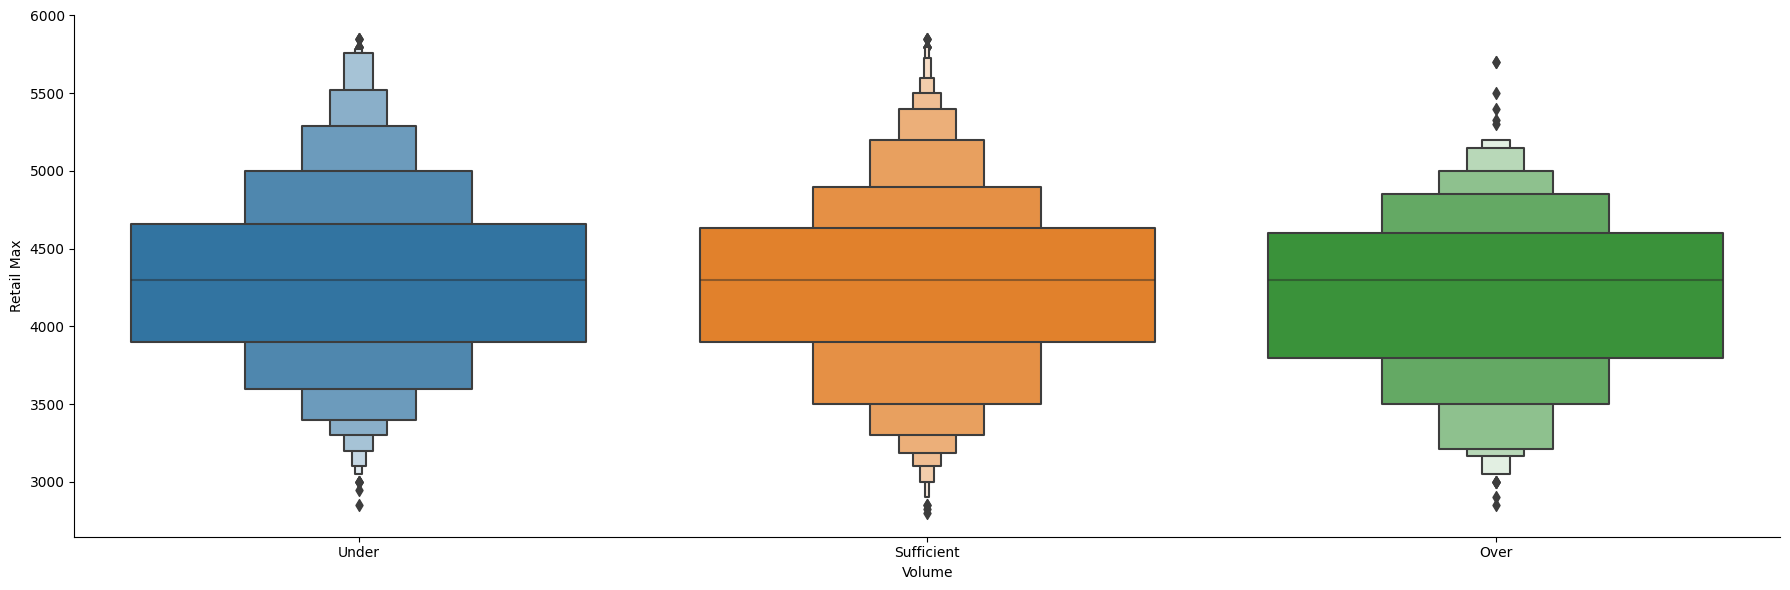

In [59]:
# market place  vs retail max
sns.catplot(y = "Retail Max", x = "Volume", data = data2.sort_values("Retail Max", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [60]:
data2.head()

,Market Place,Crop Variety,Retail Max,Volume,month,season,day
0,Shewa Robit Kebele 02 Gebeya,White Teff (Quintal),3200,Under,December,Winter,1
1,Enjbara,White Teff (Quintal),3400,Sufficient,December,Winter,1
2,Debretabor Segno Gebeya,White Teff (Quintal),3250,Under,December,Winter,1
3,Woldia Gebeya,White Teff (Quintal),2829,Sufficient,December,Winter,1
4,Merawi Gebeya,White Teff (Quintal),3200,Sufficient,December,Winter,2


In [61]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5819 entries, 0 to 6342
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Market Place  5819 non-null   object
 1   Crop Variety  5819 non-null   object
 2   Retail Max    5819 non-null   int64 
 3   Volume        5819 non-null   object
 4   month         5819 non-null   object
 5   season        5819 non-null   object
 6   day           5819 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 492.7+ KB


# Changing the object data types in to numeric values using oneHotEncoding technique

In [62]:
# As market place is Nominal Categorical data we will perform OneHotEncoding

Market_Place = data2[["Market Place"]]

Market_Place = pd.get_dummies(Market_Place, drop_first= True)

Market_Place.head()

,Market Place_Adet Gebeya,Market Place_Akeseta,Market Place_Amanuel,Market Place_Amba Georgies,Market Place_Amber,Market Place_Arerti Gebeya,Market Place_Aykel,Market Place_Bahir Dar kebele 04,Market Place_Bati Segno Gebeya,Market Place_Bichena Gebeya,...,Market Place_Shindie Gebeya,Market Place_Shola gebeya,Market Place_Wegeda Gebeya,Market Place_Wereta Arada Gebeya,Market Place_Wereyilu Segno Gebeya,Market Place_Woldia Gebeya,Market Place_Yejube,Market Place_Zemereo,Market Place_kelaji,Market Place_kombolcha kebele 03 Gebeya
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
# As crop variety is Nominal Categorical data we will perform OneHotEncoding

Crop_Variety = data2[["Crop Variety"]]

Crop_Variety = pd.get_dummies(Crop_Variety, drop_first= True)

Crop_Variety.head()

""
0
1
2
3
4


In [64]:
# As volume is Nominal Categorical data we will perform OneHotEncoding

Volume = data2[["Volume"]]

Volume = pd.get_dummies(Volume, drop_first= True)

Volume.head()

,Volume_Sufficient,Volume_Under
0,False,True
1,True,False
2,False,True
3,True,False
4,True,False


In [65]:
# As season is Nominal Categorical data we will perform OneHotEncoding

season = data2[["season"]]

season = pd.get_dummies(season, drop_first= True)

season.head(10)# the rest for the upsent == autumn

,season_Spring,season_Summer,season_Winter
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
5,False,False,True
6,False,False,True
7,False,False,True
8,False,False,True
9,False,False,True


In [66]:
# As month is Nominal Categorical data we will perform OneHotEncoding

month = data2[["month"]]

month = pd.get_dummies(month, drop_first= True)

month.head()# 

,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,False,True,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False


In [67]:
data0 = data2.copy()

#concatenation of the columns to the data

In [68]:
data = pd.concat([data2, Market_Place, Crop_Variety, Volume, season, month ], axis = 1)

In [69]:
data.head()

,Market Place,Crop Variety,Retail Max,Volume,month,season,day,Market Place_Adet Gebeya,Market Place_Akeseta,Market Place_Amanuel,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,Shewa Robit Kebele 02 Gebeya,White Teff (Quintal),3200,Under,December,Winter,1,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,Enjbara,White Teff (Quintal),3400,Sufficient,December,Winter,1,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,Debretabor Segno Gebeya,White Teff (Quintal),3250,Under,December,Winter,1,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,Woldia Gebeya,White Teff (Quintal),2829,Sufficient,December,Winter,1,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,Merawi Gebeya,White Teff (Quintal),3200,Sufficient,December,Winter,2,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [70]:
datas = data.copy()

# delating the oneHotEncoded columns

In [71]:
data.drop(["Market Place", "Crop Variety", "Volume", "season", "month"], axis = 1, inplace = True)

In [72]:
data.head()

,Retail Max,day,Market Place_Adet Gebeya,Market Place_Akeseta,Market Place_Amanuel,Market Place_Amba Georgies,Market Place_Amber,Market Place_Arerti Gebeya,Market Place_Aykel,Market Place_Bahir Dar kebele 04,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,3200,1,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,3400,1,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,3250,1,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,2829,1,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,3200,2,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


# splitting the data in  to train and test data 

In [73]:
data.columns

Index(['Retail Max', 'day', 'Market Place_Adet Gebeya ',
       'Market Place_Akeseta', 'Market Place_Amanuel',
       'Market Place_Amba Georgies', 'Market Place_Amber',
       'Market Place_Arerti Gebeya ', 'Market Place_Aykel',
       'Market Place_Bahir Dar kebele 04', 'Market Place_Bati Segno Gebeya',
       'Market Place_Bichena Gebeya', 'Market Place_Bure Woreda',
       'Market Place_Chagini', 'Market Place_Chuahit',
       'Market Place_Dabat Gebeya', 'Market Place_Dangla ',
       'Market Place_Debark Gebeya',
       'Market Place_Debere Birhan Kebele 08 Gebeya',
       'Market Place_Debere Elias Gebeya', 'Market Place_Debere Work',
       'Market Place_Debre Markos Huseta Gebeya',
       'Market Place_Debresina Gebeya',
       'Market Place_Debretabor Segno Gebeya ', 'Market Place_Degolo',
       'Market Place_Dejen Gebeya', 'Market Place_Delgie',
       'Market Place_Dembecha Gebeya', 'Market Place_Deneba',
       'Market Place_Dera Amebesamie', 'Market Place_Desse Robit Ge

In [74]:
features = data.loc[:,['day', 'Market Place_Bahir Dar kebele 04',
       'Market Place_Bonga', 'Market Place_Dilla', 'Market Place_Hawassa ',
       'Market Place_Shire-Endaselassie', 'Market Place_Sululta',
       'Market Place_Woldia Gebeya', 'Volume_Sufficient', 'Volume_Under',
       'season_Spring', 'season_Summer', 'season_Winter', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September']]

KeyError: "['Market Place_Bonga', 'Market Place_Dilla', 'Market Place_Hawassa ', 'Market Place_Shire-Endaselassie', 'Market Place_Sululta'] not in index"

In [ ]:
features.head()

,day,Market Place_Bahir Dar kebele 04,Market Place_Bonga,Market Place_Dilla,Market Place_Hawassa,Market Place_Shire-Endaselassie,Market Place_Sululta,Market Place_Woldia Gebeya,Volume_Sufficient,Volume_Under,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,3,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
1,3,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,5,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,5,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,5,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
labels = data.loc[:,'Retail Max']

In [ ]:
labels.head()

0    2650
1    2900
2    2550
3    2550
4    2400
Name: Retail Max, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

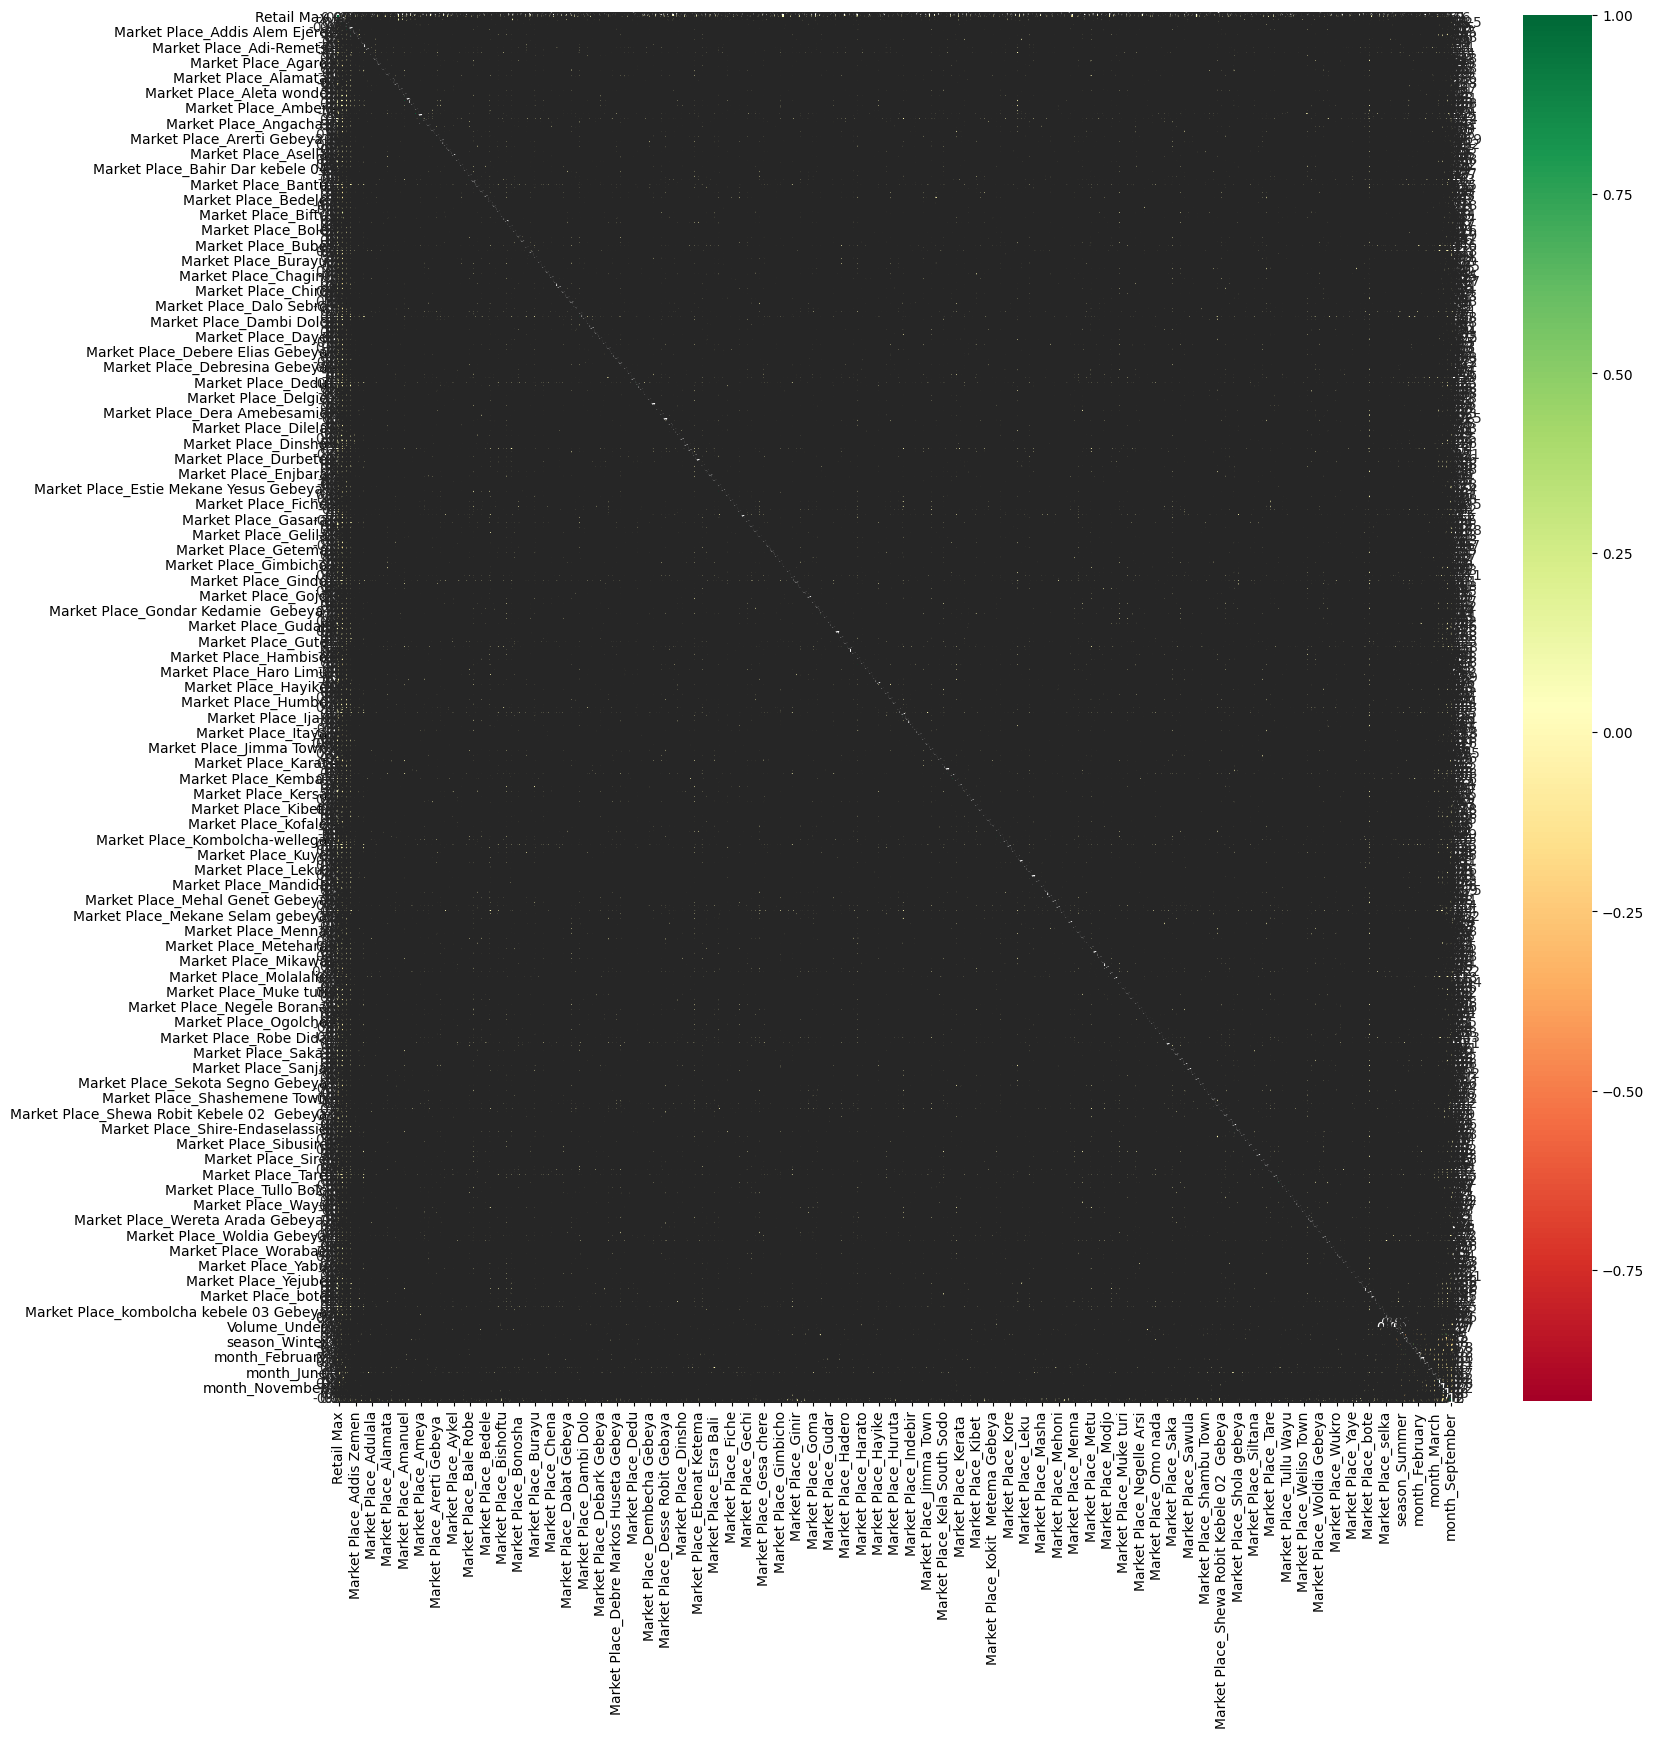

In [ ]:
#
plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [ ]:
!pip install scikit-learn


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, labels, test_size=0.2, random_state=2)

In [ ]:
len(Xtrain)# 80 percent of 934 data == 747 and 20 percent 187

17144

In [ ]:
len(Ytrain)

17144

In [ ]:
len(Xtest)

4287

In [ ]:
len(Ytest)

4287

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(Xtrain, Ytrain)

LinearRegression()

In [ ]:
ypred = model.predict(Xtest)
ypred

array([4330.49544439, 4491.62129497, 4364.74398108, ..., 4225.83517398,
       4206.17892398, 4388.33517398])

In [ ]:
Ytest

10262    4700
12401    4150
17841    5000
903      3120
3901     3500
         ... 
12019    5000
21618    6100
964      3100
7940     4200
4446     3850
Name: Retail Max, Length: 4287, dtype: int64

In [ ]:
model.score(Xtrain,Ytrain)

0.03139471228171564

In [ ]:
model.score(Xtest,Ytest)

0.033921888466893924

C:\Users\user\AppData\Local\Temp\ipykernel_12940\2343581898.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Ytest-ypred)


<IPython.core.display.Javascript object>

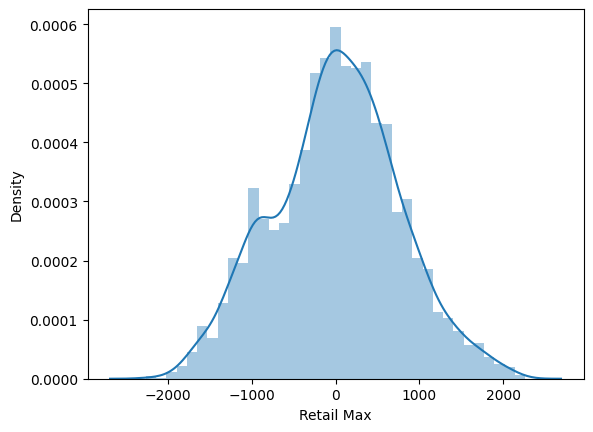

In [ ]:
sns.distplot(Ytest-ypred)
plt.show()

In [ ]:
metrics.r2_score(Ytest,ypred)

<IPython.core.display.Javascript object>

0.033921888466893924